In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json
import pandas as pd

### LOAD DATA

##### load half data raw results

In [2]:
accuracy_raw = []
path = ['e:/cs762/cs762_project/pre-result/resnet18-result/out_resnet18-0.5_0_0.json',
'e:/cs762/cs762_project/exp_res/12_05_partial/tmp.h57B0Jo7gZ_train_resnet18.py.json',
'e:/cs762/cs762_project/exp_res/12_05_partial/tmp.hZKTLigTsK_train_resnet18.py.json']
for i in range(2):
    try:
        with open(path[i], "r") as f:
            data = json.load(f)
        tmp = []
        for j in range(len(data)):
            tmp.append(data[j]['accuracy'])
        tmp = np.array(tmp)
    except:
        tmp = np.array(pd.read_json(path[i], lines=True)['accuracy'])
    accuracy_raw.append(np.array(tmp))
accuracy_raw = np.stack(accuracy_raw)
mean_accuracy_raw = np.mean(accuracy_raw,axis=0)
std_accuracy_raw = np.std(accuracy_raw,axis=0)

##### load full data raw results

In [3]:
accuracy_raw_full = []
path = ['e:/cs762/cs762_project/pre-result/resnet18-result/out_resnet18-1_0_0.json',
'e:/cs762/cs762_project/exp_res/12_01_partial/tmp.Jsnokhzht8_train_resnet18.py.json',
'e:/cs762/cs762_project/exp_res/12_01_partial/tmp.MCpWTHC4Si_train_resnet18.py.json']
for i in range(3):
    try:
        with open(path[i], "r") as f:
            data = json.load(f)
        tmp = []
        for j in range(len(data)):
            tmp.append(data[j]['accuracy'])
        tmp = np.array(tmp)
    except:
        tmp = np.array(pd.read_json(path[i], lines=True)['accuracy'])
    accuracy_raw_full.append(np.array(tmp))
accuracy_raw_full = np.stack(accuracy_raw_full)
mean_accuracy_raw_full = np.mean(accuracy_raw_full,axis=0)
std_accuracy_raw_full = np.std(accuracy_raw_full,axis=0)

##### load vertical flip augumentation results

In [4]:
accuracy_v_flip = []
for i in range(1,4):
    path = 'e:/cs762/cs762_project/exp_res/aug_cp/aug_with_random_select/train_results/out_resnet18-0.5_0_0_0_0.5-%d.json'%i
    with open(path, "r") as f:
        data = json.load(f)
    tmp = []
    for j in range(len(data)):
        tmp.append(data[j]['accuracy'])
    accuracy_v_flip.append(np.array(tmp))
accuracy_v_flip = np.stack(accuracy_v_flip)
mean_accuracy_v_flip = np.mean(accuracy_v_flip,axis=0)
std_accuracy_v_flip = np.std(accuracy_v_flip,axis=0)

##### load rotation augumentation results

In [5]:
accuracy_rotation = []
for i in range(1,4):
    path = 'e:/cs762/cs762_project/exp_res/aug_cp/aug_with_random_select/train_results/out_resnet18-0.5_0_0_0.5_0-%d.json'%i
    with open(path, "r") as f:
        data = json.load(f)
    tmp = []
    for j in range(len(data)):
        tmp.append(data[j]['accuracy'])
    accuracy_rotation.append(np.array(tmp))
accuracy_rotation = np.stack(accuracy_rotation)
mean_accuracy_rotation = np.mean(accuracy_rotation,axis=0)
std_accuracy_rotation = np.std(accuracy_rotation,axis=0)

##### load synthetic-1 augmentation results

In [6]:
accuracy_synthetic_1 = []
path = ['e:/cs762/cs762_project/pre-result/resnet18-result/out_resnet18-0.5_0.5_0.json',
'e:/cs762/cs762_project/exp_res/12_01_partial/tmp.BuaUjuxN6z_train_resnet18.py.json',
'e:/cs762/cs762_project/exp_res/12_05_partial/tmp.JLyhX9tXsz_train_resnet18.py.json']
for i in range(3):
    try:
        with open(path[i], "r") as f:
            data = json.load(f)
        tmp = []
        for j in range(len(data)):
            tmp.append(data[j]['accuracy'])
        tmp = np.array(tmp)
    except:
        tmp = np.array(pd.read_json(path[i], lines=True)['accuracy'])
    accuracy_synthetic_1.append(np.array(tmp))
accuracy_synthetic_1 = np.stack(accuracy_synthetic_1)
mean_accuracy_synthetic_1 = np.mean(accuracy_synthetic_1,axis=0)
std_accuracy_synthetic_1 = np.std(accuracy_synthetic_1,axis=0)

##### load synthetic-2 augmentation results

In [7]:
accuracy_synthetic_2 = []
path = ['e:/cs762/cs762_project/pre-result/resnet18-result/out_resnet18-0.5_0_0.5.json',
'e:/cs762/cs762_project/exp_res/12_05_partial/tmp.9H2XwGJqGt_train_resnet18.py.json',
'e:/cs762/cs762_project/exp_res/12_01_partial/tmp.PMViDShv3Q_train_resnet18.py.json']
for i in range(3):
    try:
        with open(path[i], "r") as f:
            data = json.load(f)
        tmp = []
        for j in range(len(data)):
            tmp.append(data[j]['accuracy'])
        tmp = np.array(tmp)
    except:
        tmp = np.array(pd.read_json(path[i], lines=True)['accuracy'])
    accuracy_synthetic_2.append(np.array(tmp))
accuracy_synthetic_2 = np.stack(accuracy_synthetic_2)
mean_accuracy_synthetic_2 = np.mean(accuracy_synthetic_2,axis=0)
std_accuracy_synthetic_2 = np.std(accuracy_synthetic_2,axis=0)

### PLOT

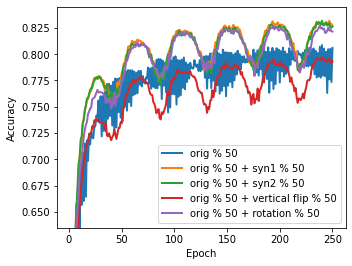

In [8]:
epochs = np.arange(1,251)
plt.rcParams['figure.figsize']=(5,4)
fig, ax = plt.subplots(1)
ax.plot(epochs, mean_accuracy_raw, linewidth=2, label='orig % 50')
ax.plot(epochs, mean_accuracy_synthetic_1, linewidth=2, label='orig % 50 + syn1 % 50')
ax.plot(epochs, mean_accuracy_synthetic_2, linewidth=2, label='orig % 50 + syn2 % 50')
ax.plot(epochs, mean_accuracy_v_flip, linewidth=2, label='orig % 50 + vertical flip % 50')
ax.plot(epochs, mean_accuracy_rotation, linewidth=2, label='orig % 50 + rotation % 50')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=4)   
plt.ylim(0.635,0.845)
fig.tight_layout(rect=(0,0,1,.95))
plt.savefig('e:/cs762/cs762_project/exp_res/aug_cp/aug_with_random_select/analyze_results/val_acc_without_full.png',dpi=600,bbox_inches='tight')

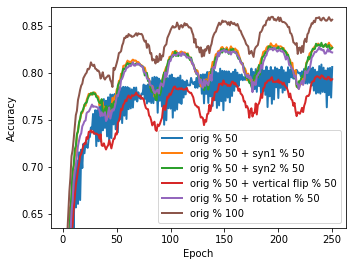

In [9]:
epochs = np.arange(1,251)
fig, ax = plt.subplots(1)
ax.plot(epochs, mean_accuracy_raw, linewidth=2, label='orig % 50')
ax.plot(epochs, mean_accuracy_synthetic_1, linewidth=2, label='orig % 50 + syn1 % 50')
ax.plot(epochs, mean_accuracy_synthetic_2, linewidth=2, label='orig % 50 + syn2 % 50')
ax.plot(epochs, mean_accuracy_v_flip, linewidth=2, label='orig % 50 + vertical flip % 50')
ax.plot(epochs, mean_accuracy_rotation, linewidth=2, label='orig % 50 + rotation % 50')
ax.plot(epochs, mean_accuracy_raw_full, linewidth=2, label='orig % 100')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc=4)   
ax.set_ylim(0.635,0.87)
fig.tight_layout(rect=(0,0,1,.95))
fig.savefig('e:/cs762/cs762_project/exp_res/aug_cp/aug_with_random_select/analyze_results/val_acc_with_full.png',dpi=600,bbox_inches='tight')

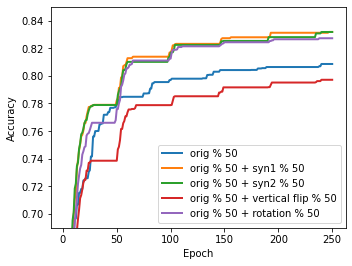

In [10]:
epochs = np.arange(1,251) 
fig, ax = plt.subplots(1)
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_raw), linewidth=2, label='orig % 50')
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_synthetic_1), linewidth=2, label='orig % 50 + syn1 % 50')
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_synthetic_2), linewidth=2, label='orig % 50 + syn2 % 50')
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_v_flip), linewidth=2, label='orig % 50 + vertical flip % 50')
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_rotation), linewidth=2, label='orig % 50 + rotation % 50')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc=4)   
ax.set_ylim(0.69,0.85)
fig.tight_layout(rect=(0,0,1,.95))
fig.savefig('e:/cs762/cs762_project/exp_res/aug_cp/aug_with_random_select/analyze_results/val_acc_without_full_runningmax.png',dpi=600,pad_inches=0.001)

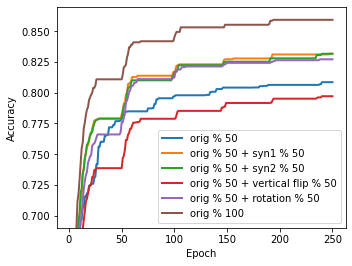

In [11]:
epochs = np.arange(1,251) 
fig, ax = plt.subplots(1)
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_raw), linewidth=2, label='orig % 50')
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_synthetic_1), linewidth=2, label='orig % 50 + syn1 % 50')
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_synthetic_2), linewidth=2, label='orig % 50 + syn2 % 50')
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_v_flip), linewidth=2, label='orig % 50 + vertical flip % 50')
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_rotation), linewidth=2, label='orig % 50 + rotation % 50')
ax.plot(epochs, np.maximum.accumulate(mean_accuracy_raw_full), linewidth=2, label='orig % 100')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc=4)   
ax.set_ylim(0.69,0.87)
fig.tight_layout(rect=(0,0,1,.95))
fig.savefig('e:/cs762/cs762_project/exp_res/aug_cp/aug_with_random_select/analyze_results/val_acc_with_full_runningmax.png',dpi=600,pad_inches=0.001)

### FOR TABLE

In [12]:
table = pd.DataFrame([['%f(%f)'%(np.maximum.accumulate(mean_accuracy_raw)[-1],std_accuracy_raw[np.argmax(mean_accuracy_raw)])],
['%f(%f)'%(np.maximum.accumulate(mean_accuracy_synthetic_1)[-1],std_accuracy_synthetic_1[np.argmax(mean_accuracy_synthetic_1)])],
['%f(%f)'%(np.maximum.accumulate(mean_accuracy_synthetic_2)[-1],std_accuracy_synthetic_2[np.argmax(mean_accuracy_synthetic_2)])],
['%f(%f)'%(np.maximum.accumulate(mean_accuracy_v_flip)[-1],std_accuracy_v_flip[np.argmax(mean_accuracy_v_flip)])],
['%f(%f)'%(np.maximum.accumulate(mean_accuracy_rotation)[-1],std_accuracy_rotation[np.argmax(mean_accuracy_rotation)])],
['%f(%f)'%(np.maximum.accumulate(mean_accuracy_raw_full)[-1],std_accuracy_raw_full[np.argmax(mean_accuracy_raw_full)])]],
index=['orig % 50','orig % 50 + syn1 % 50','orig % 50 + syn2 % 50','orig % 50 + vertical flip % 50','orig % 50 + rotation % 50','orig % 100'],columns=['Accuracy'])
print(table)

                                          Accuracy
orig % 50                       0.808600(0.001600)
orig % 50 + syn1 % 50           0.831800(0.002128)
orig % 50 + syn2 % 50           0.831767(0.003277)
orig % 50 + vertical flip % 50  0.797167(0.002829)
orig % 50 + rotation % 50       0.827233(0.002616)
orig % 100                      0.859400(0.001337)
